In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Loading the dataset
import pandas as pd

drug=pd.read_csv(r"C:\Users\HENRY\Downloads\drugsCom_raw\drugsComTrain_raw.tsv",sep ='\t')

In [4]:
#Preview the data
drug.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
#Missing Values
drug.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [6]:
#Missing Values
drug.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

**OBSERVATION**<br>
Most of missing values are in the condition column
This can indicate that most people are unaware of the condition by name or some people dont want to give out that type of information.

In [7]:
#Question on drug
#How many drugs do we have?

In [8]:
len(drug['drugName'].unique().tolist())

3436

In [9]:
#Which is the most popular drugs?
drug['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Midamor                                 1
Primatene                               1
Benzoyl peroxide / salicylic acid       1
BiDil                                   1
Odefsey                                 1
Name: drugName, Length: 3436, dtype: int64

In [10]:
#Top 15 most popular drugs
drug['drugName'].value_counts().nlargest(15)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Name: drugName, dtype: int64

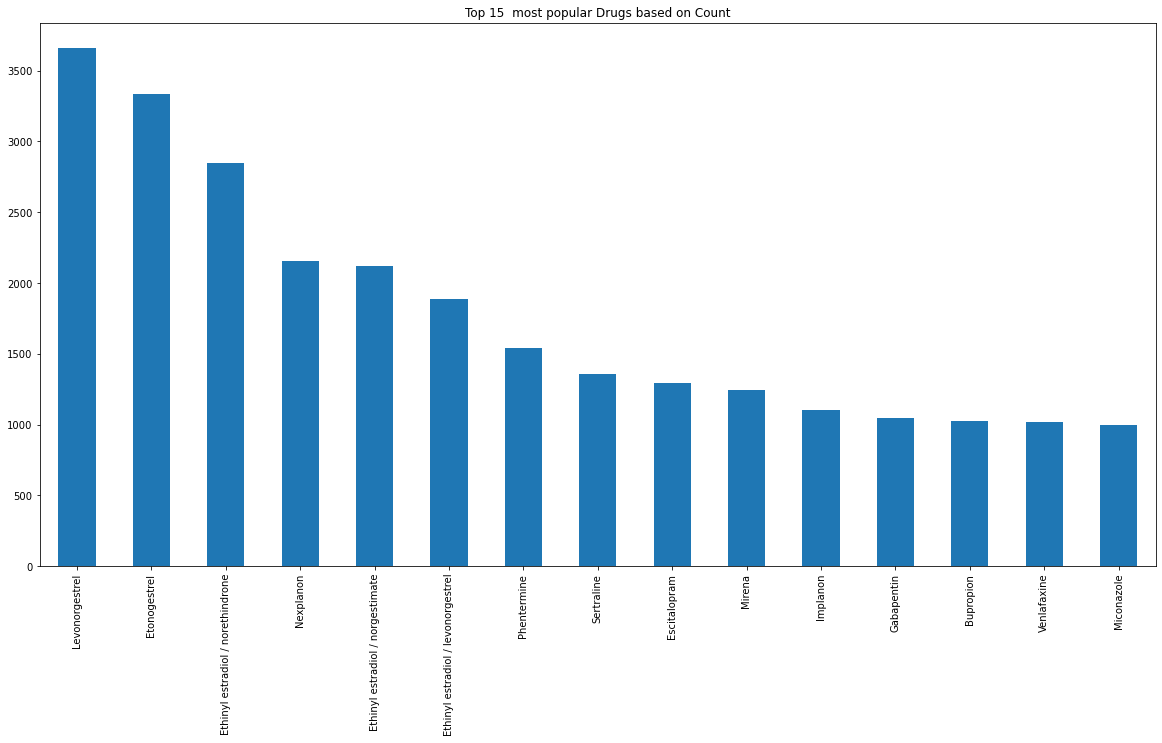

In [11]:
#The Most popular(top 15) visualization
plt.figure(figsize=(20,10))
drug['drugName'].value_counts().nlargest(15).plot(kind='bar')
plt.title("Top 15  most popular Drugs based on Count")
plt.show()

**OBSERVATION**<br>
Levonorgestrel is the most popular drug.<br>
Etonogestrel is the second most popular drug<br>


> Both of them are hormonal drugs which are associated with birth control methods




In [12]:
#The 15 least popular drugs
drug['drugName'].value_counts().nsmallest(15)

Ponatinib                            1
Alka-Seltzer Cold and Sinus          1
Reslizumab                           1
Fludara                              1
Timoptic Ocudose                     1
Senexon                              1
Cheratussin DAC                      1
Benzoyl peroxide / hydrocortisone    1
Zyprexa Intramuscular                1
Mitoxantrone                         1
Haldol Decanoate                     1
Phenohytro                           1
Chlorcyclizine / phenylephrine       1
Constulose                           1
Streptokinase                        1
Name: drugName, dtype: int64

**OBSERVATION**<br>
The least common drugs are very specific and are diversified.
Example:

*   Clemastine: This an antihistamine that reduces the effects of natural chemical histamine in the body
*   Hexachlorophene, also known as Nabac: This an organochlorine compound that was once widely used as a disinfectant.




In [13]:
drug_suffix = {
    "alol":"Beta blocker or alpha blocker",
    "ase":"Enzymes",
    "azepam":"Antianxiety"
  ,"bactam":"Beta-lactamase inhibitors"
,"caine":"Local anesthetics"
,"cilin":"Penicillins"
,"conazole":"Antifungals"
,"cycline":"Antibiotics"
,"dralazine":"Antihypertensives"
,"flurane":"Inhalation Anesthetic"
,"lukast":"Leukotriene receptor antagonists"
,"mantadine":"Antivirals"
,"mycin":"Antivirals"
,"olol":"Beta blockers"
,"olone":"Steroids"
,"oxacin":"Antifungals"
,"parin":"Antibiotics"
,"peridol":"Antipsychotics"
,"poetin":"Erythropoeitin"
,"pril":"ACE Inhibitors"
,"sartan":"Angiotensin II receptor blockers"
,"sulfa":"Antibiotics"
,"thiazide":"Thiazide Diuretics"
,'vastatin':"HMG-CoA inhibitors"
}

In [14]:
#This function classifies drugs based on the name you have inputed.
def classify_D(drugname):
  for i in drug_suffix.keys():
    if drugname.endswith(i):
      print(True)
      print("The drug class is: ",drug_suffix[i])

In [15]:
#Classifying the drug class example
classify_D('Atenolol')

True
The drug class is:  Beta blockers


In [16]:
classify_D('captopril')

True
The drug class is:  ACE Inhibitors


In [17]:
def classify_D(drugname):
  for i in drug_suffix.keys():
    if drugname.endswith(i):
      return drug_suffix[i]

In [18]:
classify_D('captopril')

'ACE Inhibitors'

In [19]:
#We've added the column drug_class and applied the function to each drug name
drug['drug_class']= drug['drugName'].apply(classify_D)

In [20]:
drug[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,Angiotensin II receptor blockers
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,None
161294,Orencia,None
161295,Thyroid desiccated,None


In [21]:
#How many groups of drugs by class
drug['drug_class'].unique().tolist()

['Angiotensin II receptor blockers',
 None,
 'Antifungals',
 'Antivirals',
 'Antianxiety',
 'Antibiotics',
 'Beta blockers',
 'ACE Inhibitors',
 'Enzymes',
 'Leukotriene receptor antagonists',
 'Thiazide Diuretics',
 'HMG-CoA inhibitors',
 'Steroids',
 'Local anesthetics',
 'Antihypertensives',
 'Beta blocker or alpha blocker',
 'Antipsychotics',
 'Beta-lactamase inhibitors']

In [22]:
len(drug['drug_class'].unique().tolist())

18

In [23]:
#Which class of drug is the most common?
drug['drug_class'].value_counts()

Antifungals                         2917
Antianxiety                         1819
Antivirals                          1610
Antibiotics                          981
Beta blockers                        966
Angiotensin II receptor blockers     560
ACE Inhibitors                       432
Steroids                             298
HMG-CoA inhibitors                   294
Leukotriene receptor antagonists     176
Local anesthetics                    129
Enzymes                              116
Thiazide Diuretics                    93
Antipsychotics                        51
Beta blocker or alpha blocker         30
Antihypertensives                     12
Beta-lactamase inhibitors              3
Name: drug_class, dtype: int64

**OBSERVATION**<br>
The most common class of drug is antifungal

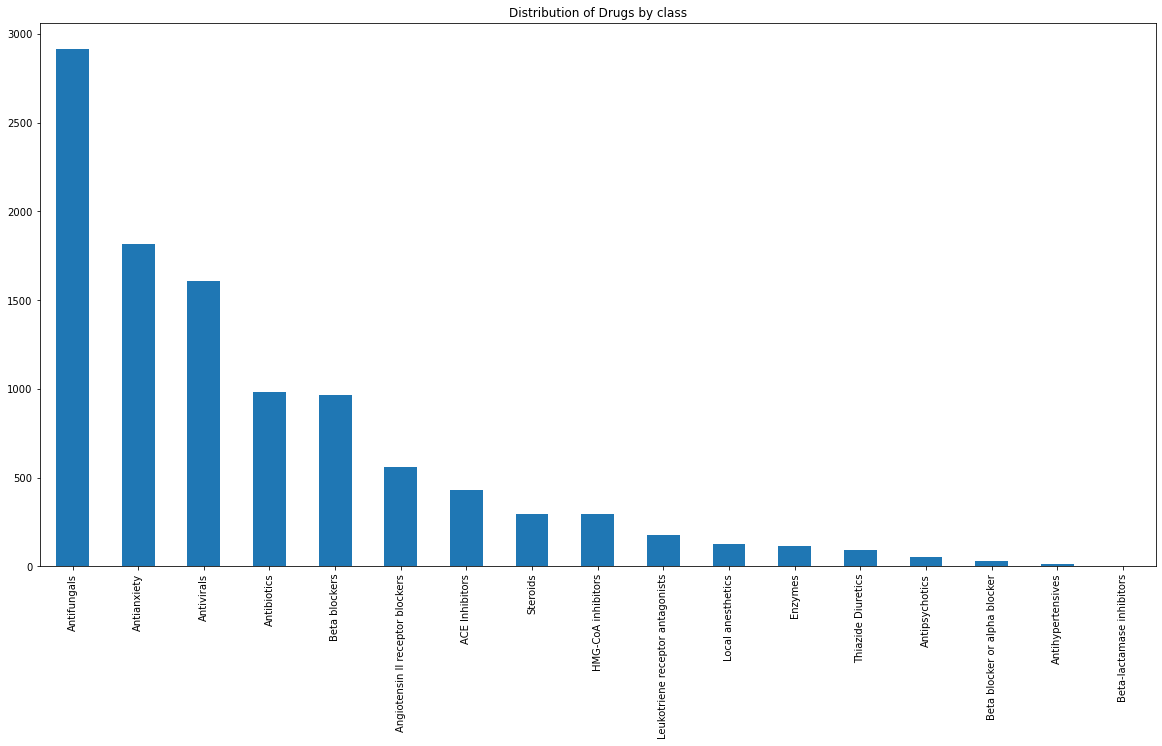

In [24]:
plt.figure(figsize=(20,10))
drug['drug_class'].value_counts().plot(kind='bar')
plt.title("Distribution of Drugs by class")
plt.show()

**OBSERVATION**<br>
The most common class of drugs used is:<br>
+ Antifunngal<br>
+ Antianxiety<br>
+ Antivirals<br>
+ Antibiotics<br>
+ Beta blockers<br>

In [25]:
#THE NUMBER OF CONDITION
len(drug['condition'].unique())

885

**OBSERVATION**<br>
+ We have 885 different conditions

In [26]:
#Distribution of conditions per count
drug['condition'].value_counts()

Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
48</span> users found this comment helpful.        1
Q Feve                                             1
acial Lipoatrophy                                  1
Primary Hyperaldosteronism Diagnosis               1
Ramsay Hunt Syndrome                               1
Name: condition, Length: 884, dtype: int64

In [27]:
#Getting the top 15 most common conditions
drug['condition'].value_counts().nlargest(15)


Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Name: condition, dtype: int64

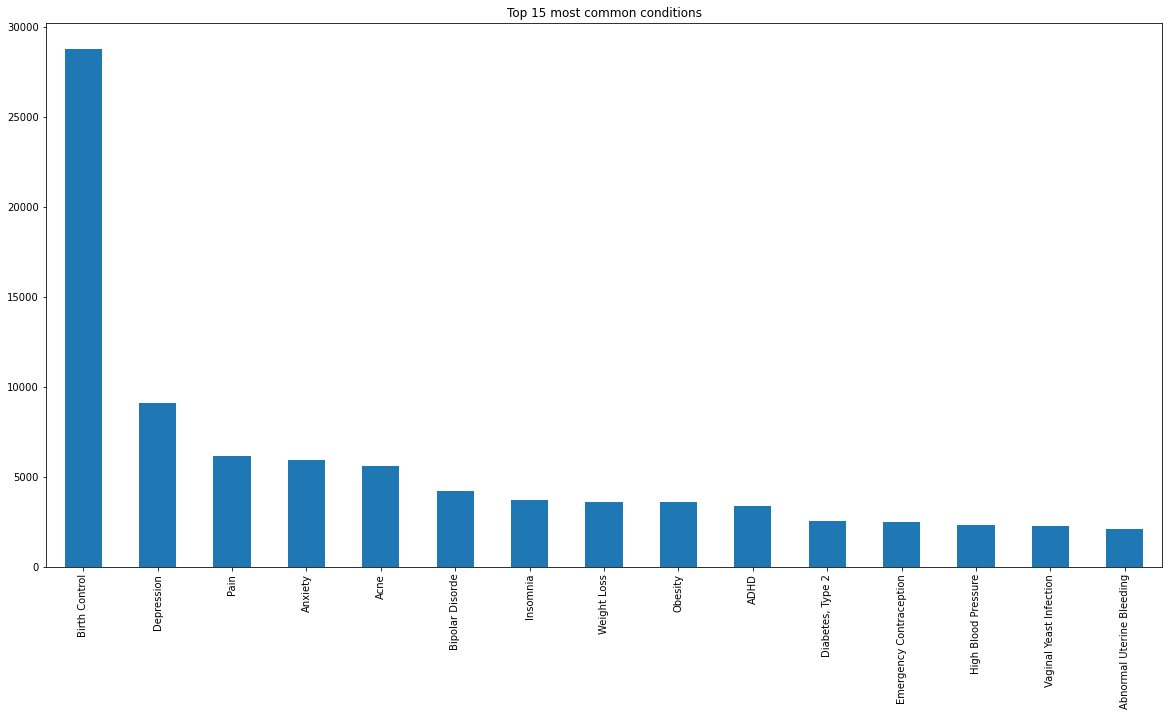

In [28]:
plt.figure(figsize=(20,10))
drug['condition'].value_counts().nlargest(15).plot(kind='bar')
plt.title("Top 15 most common conditions")
plt.show()

**OBSERVATION**<br>
Birth control is the most common condition. It far outweighs all other conditions almost combined<br>
+ Depression is the 2nd most common. <br>
+ Pain is the third<br>
+ Anxiety follows

In [29]:
#The top 10 least common conditions
drug['condition'].value_counts().nsmallest(15)


Hodgkin's Lymphoma                             1
79</span> users found this comment helpful.    1
Hypokalemic Periodic Paralysis                 1
Neoplastic Diseases                            1
Myeloproliferative Disorders                   1
34</span> users found this comment helpful.    1
ungal Pneumonia                                1
Amyotrophic Lateral Sclerosis                  1
Cluster-Tic Syndrome                           1
77</span> users found this comment helpful.    1
40</span> users found this comment helpful.    1
Epicondylitis, Tennis Elbow                    1
Bartonellosis                                  1
Dissociative Identity Disorde                  1
Schilling Test                                 1
Name: condition, dtype: int64

**OBSERVATIONS**<br>
The least common we have examples such as:<br>
+    Hemangioma<br>
+    Small Bowel<br>
+    Tranverse Mellitus<br>
+    Tinea Barbae<br>
        

In [30]:
#Drugs per condition Top 15
drug.groupby('condition')['drugName'].nunique().nlargest(15)

condition
Not Listed / Othe            214
Pain                         200
Birth Control                172
High Blood Pressure          140
Acne                         117
Depression                   105
Rheumatoid Arthritis          98
Diabetes, Type 2              89
Allergic Rhinitis             88
Bipolar Disorde               80
Osteoarthritis                80
Anxiety                       78
Insomnia                      78
Abnormal Uterine Bleeding     74
Migraine                      59
Name: drugName, dtype: int64

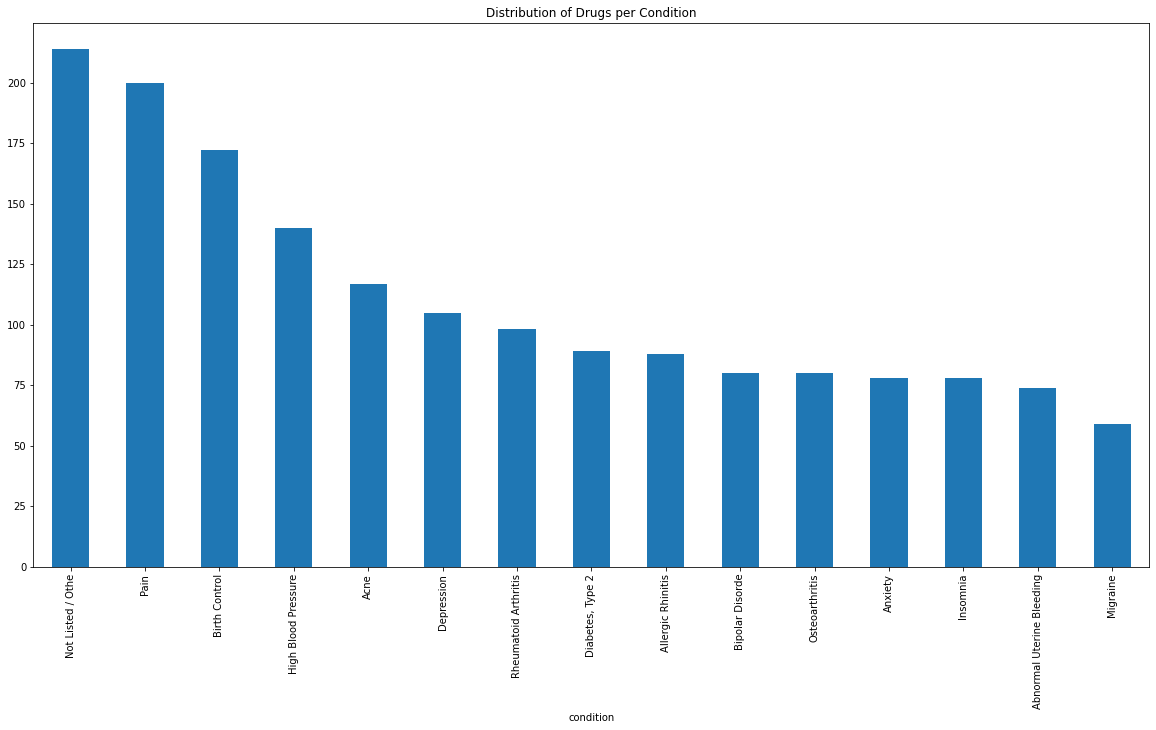

In [31]:


plt.figure(figsize=(20,10))
drug.groupby('condition')['drugName'].nunique().nlargest(15).plot(kind="bar")
plt.title("Distribution of Drugs per Condition")
plt.show()

**OBSERVATION**" <br>
+ Pain has the most variety of drugs to treat it.<br>
+ Birth control has the second most variety of drugs.

In [32]:
 #Distribution of drugs per Drug Group on size
D_groups= drug.groupby('drug_class').size()

In [33]:
type(D_groups)

pandas.core.series.Series

In [34]:
#convert to DataFrame
drug_Df=pd.DataFrame({'drug_class':D_groups.index,'counts':D_groups.values})


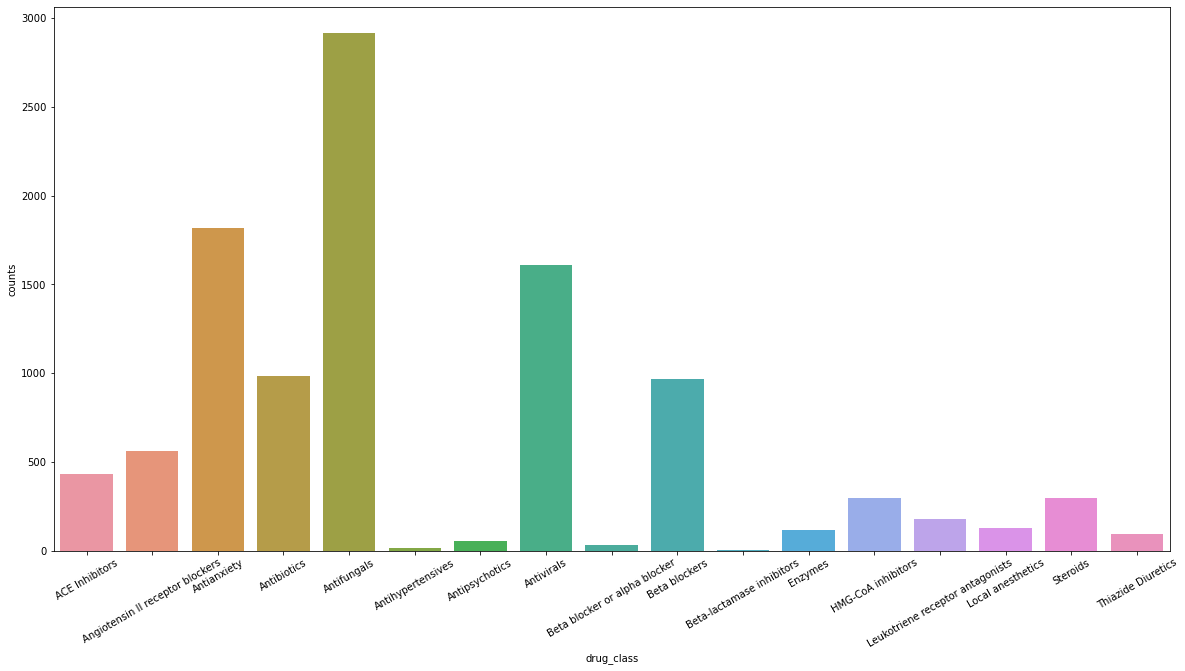

In [35]:
#Seaborn plot 
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_Df,x='drug_class',y='counts')
g.set_xticklabels(drug_Df['drug_class'].values,rotation=30)
plt.show()

In [36]:
drug['rating']

0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161297, dtype: float64

In [37]:
#Distribution of Rating by size
drug.groupby('rating').size()

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

<AxesSubplot:ylabel='None'>

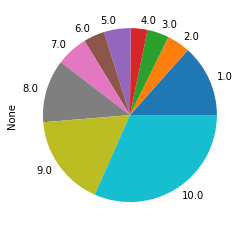

In [38]:
#Distribution of Rating by size(Visualization)
drug.groupby('rating').size().plot(kind='pie')

<AxesSubplot:xlabel='rating'>

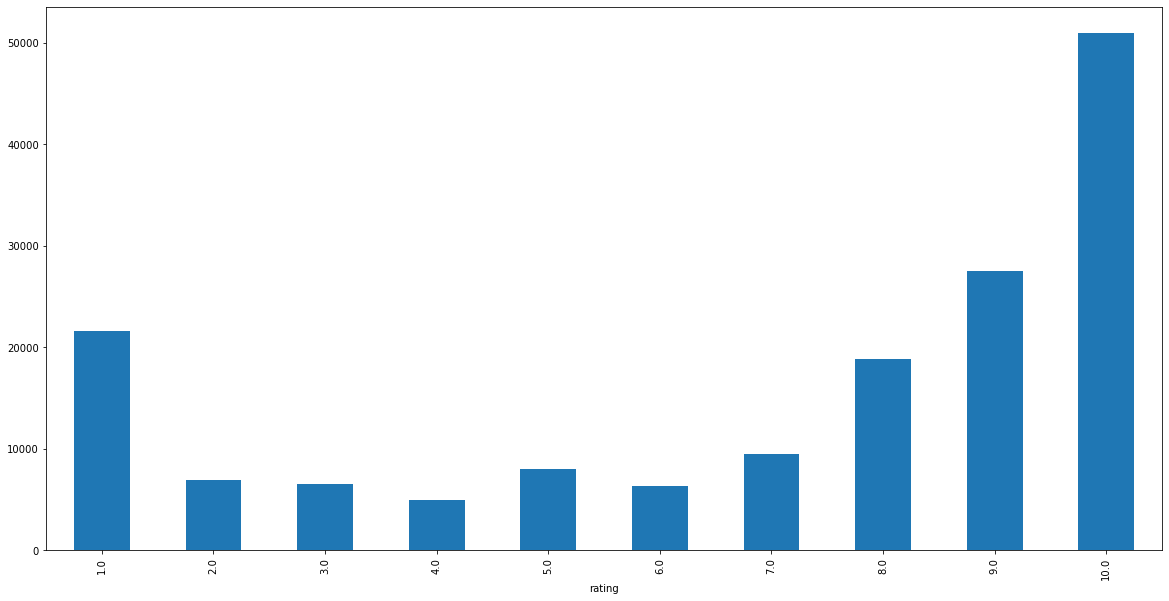

In [149]:
#Distribution of Rating by size(Visualization by bar)
drug.groupby('rating').size().plot(kind='bar',figsize=(20,10))

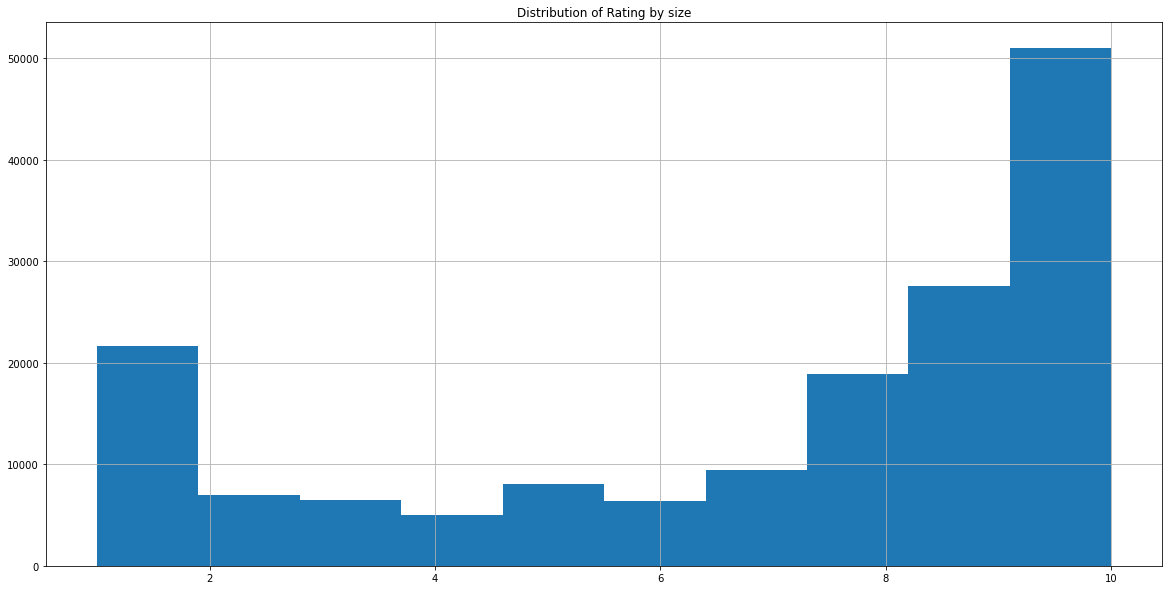

In [40]:
#Distribution of Rating by size(Visualization by bar)
plt.figure(figsize=(20,10))
drug['rating'].hist()
plt.title("Distribution of Rating by size")
plt.show()

**OBSERVATIONS**<br>
Most people rated 9,10,or 1
+ They rated with extremes

In [41]:
#Average Rating
avg_rating = (drug['rating'].groupby(drug['drugName']).mean())

In [42]:
print(avg_rating)

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64


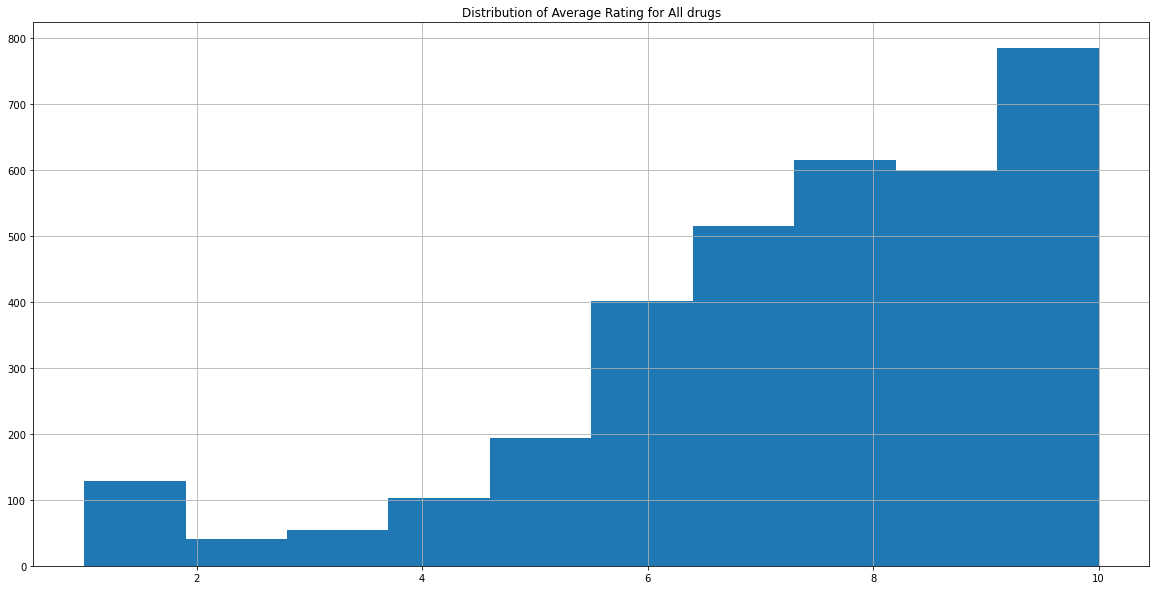

In [43]:
#Average rating for all the drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title('Distribution of Average Rating for All drugs')
plt.show()

In [44]:
#Average Rating of drug per Drrug class
avg_rating_inClass = (drug['rating'].groupby(drug['drug_class']).mean())

In [45]:
avg_rating_inClass

drug_class
ACE Inhibitors                      5.759259
Angiotensin II receptor blockers    6.464286
Antianxiety                         8.423859
Antibiotics                         6.917431
Antifungals                         4.603017
Antihypertensives                   3.833333
Antipsychotics                      5.862745
Antivirals                          6.732919
Beta blocker or alpha blocker       7.566667
Beta blockers                       7.681159
Beta-lactamase inhibitors           7.666667
Enzymes                             7.103448
HMG-CoA inhibitors                  5.588435
Leukotriene receptor antagonists    5.823864
Local anesthetics                   5.937984
Steroids                            7.597315
Thiazide Diuretics                  5.720430
Name: rating, dtype: float64

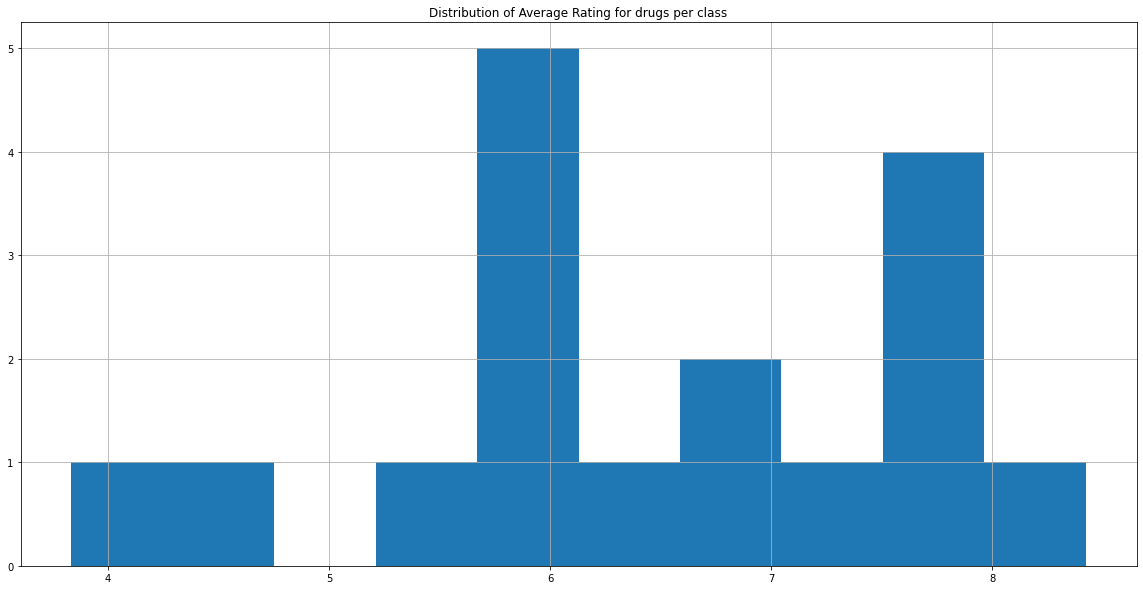

In [46]:
#Average rating for all the drugs
plt.figure(figsize=(20,10))
avg_rating_inClass.hist()
plt.title('Distribution of Average Rating for drugs per class')
plt.show()

In [47]:
#Which drugs have the highest rating?
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

In [48]:
#The drugs which group of drugs have the higheat mean/average rating
avg_rating_inClass.nlargest(10)

drug_class
Antianxiety                         8.423859
Beta blockers                       7.681159
Beta-lactamase inhibitors           7.666667
Steroids                            7.597315
Beta blocker or alpha blocker       7.566667
Enzymes                             7.103448
Antibiotics                         6.917431
Antivirals                          6.732919
Angiotensin II receptor blockers    6.464286
Local anesthetics                   5.937984
Name: rating, dtype: float64

**OBSERVATION**<br>
+ The Class of drug with the highest rating is Antianxiety 
+ Either People on anti-anxiety medicine have noticed that
the medicine is working as expected or either working very well or 
People on anti-anxiety medicine are very vocal and open with their use of the medicine

#QUESTION ON USEFUL COUNT
+ Number of users who found review useful

In [49]:
from textblob import TextBlob

In [50]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [51]:
drug['review']

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [55]:
#this function gets the  numerical value of the blob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity
#this function automaticlly determines numerical value(positive or negative)
def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity <0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [56]:
#the function example
get_sentiment('I love going to school')

0.5

In [57]:
#the function example
get_sentiment_label('I love going to school')

'positive'

In [58]:
#The function example
get_sentiment_label('I hate going to school')

'negative'

In [61]:
#Creating a column containing sentiment 
drug['sentiment value'] = drug['review'].apply(get_sentiment)

In [64]:
drug['sentiment_label'] = drug['review'].apply(get_sentiment_label)

In [65]:
drug[['review','sentiment value','sentiment_label']]

,review,sentiment value,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [66]:
  #The number of negative, positive and neutral reviews
drug['sentiment_label'].value_counts()

positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

<AxesSubplot:ylabel='sentiment_label'>

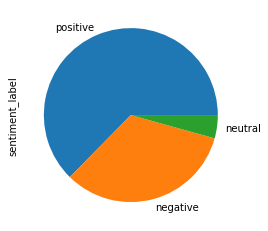

In [152]:
 #Visualization
drug['sentiment_label'].value_counts().plot(kind ='pie')

**OBSERVATION**<br>
+ Positive reviews seem to be the majority.
+ Neutral seems to be the least populated
+ Negative reviews seem to be the second most populated. 

<AxesSubplot:xlabel='rating', ylabel='sentiment value'>

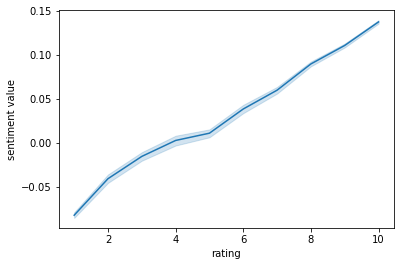

In [68]:
#Correlation Between our sentiment and rating
sns.lineplot(data = drug, x= 'rating',y='sentiment value')
plt.show()

**OBSERVATION**<br>
The correlation between rating and sentiment value is **positive** because<br>
+ As the rating increases the sentiment value increases as well

<AxesSubplot:xlabel='rating', ylabel='sentiment value'>

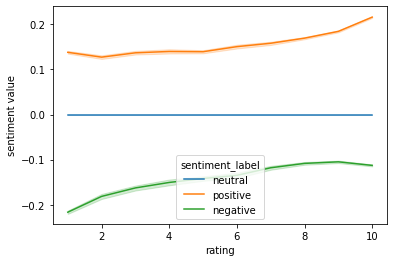

In [69]:
#Correlation between rating and sentiment
sns.lineplot(data = drug, x= 'rating',y='sentiment value',hue ='sentiment_label')

In [70]:
#How many reviews are genuine as compared to rating


In [78]:
#Genuine good rating
good_Genuine_R = drug[(drug['rating'] >=6)&(drug['sentiment_label']=='positive')]

In [74]:
#Genuine bad rating
bad_Genuine_R = drug[(drug['rating'] <= 4)&(drug['sentiment_label']=='negative')]

In [76]:
bad_Genuine_R.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment value,sentiment label,sentiment_label
12,191290,Pentasa,Crohn's Disease,"""I had Crohn&#039;s with a resection 30 years ...",4.0,"July 6, 2013",8,None,-0.106667,negative,negative
13,221320,Dextromethorphan,Cough,"""Have a little bit of a lingering cough from a...",4.0,"September 7, 2017",1,None,-0.036574,negative,negative
33,214453,Tioconazole,Vaginal Yeast Infection,"""The burning is out of control about 20 minute...",1.0,"September 11, 2015",2,Antifungals,-1.000000,negative,negative
36,125343,Dulcolax,Constipation,"""SO MUCH PAIN! \r\nIn the last 2 years I have ...",1.0,"February 13, 2016",10,None,-0.149548,negative,negative
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3,None,-0.136508,negative,negative


In [79]:
good_Genuine_R.head ()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment value,sentiment label,sentiment_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,positive,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,positive,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,positive,positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,None,0.074107,positive,positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,positive,positive


In [83]:
#Getting the first record and Observing the review ONLY
good_Genuine_R.iloc[0]['review']

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [84]:
#Getting the first record and Observing the rating ONLY
good_Genuine_R.iloc[0]['rating']

8.0

**OBSERVATION**<br>
+ The parent of the patient has described how good the drug **'Intuniv'** was
and they have stated the benefits of the drug they seem to be happy with the drug.<br>
+ This could justify giving the rating of 8.0.

In [92]:
#Number of genuine reviews
len(good_Genuine_R)

81044

In [93]:
#Number of bad reviews
len(bad_Genuine_R)

21995

In [96]:
#percentage of good reviews
print(len(good_Genuine_R)/len(drug)*100,'%')

50.245199848726266 %


In [97]:
#Percentage of bad reviews
print(len(bad_Genuine_R)/len(drug)*100,'%')

13.636335455712134 %


In [99]:
drug.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [101]:
#Top Drugs per usefulCount
drug.groupby('drugName')['usefulCount'].nunique().nlargest(15)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Name: usefulCount, dtype: int64

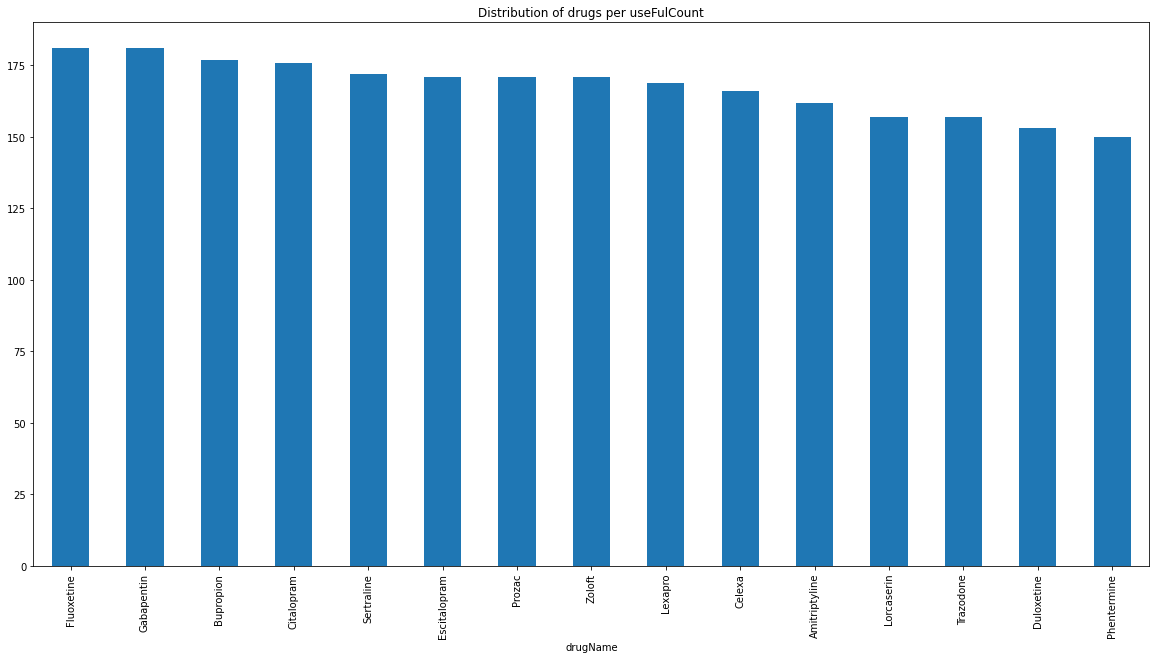

In [106]:
plt.figure(figsize=(20,10))
drug.groupby('drugName')['usefulCount'].nunique().nlargest(15).plot(kind='bar')
plt.title('Distribution of drugs per useFulCount')
plt.show()

**OBSERVATION**<br>
+ There is a minor difference in the top 15 drugs per usefulCount

In [107]:
#Top Drugs Class per usefulCount
drug.groupby('drug_class')['usefulCount'].nunique().nlargest(15)

drug_class
Antianxiety                         178
Angiotensin II receptor blockers    129
Beta blockers                       123
HMG-CoA inhibitors                  121
ACE Inhibitors                      111
Antifungals                         110
Antivirals                           97
Antibiotics                          87
Steroids                             74
Leukotriene receptor antagonists     66
Thiazide Diuretics                   62
Enzymes                              59
Local anesthetics                    47
Beta blocker or alpha blocker        28
Antipsychotics                       24
Name: usefulCount, dtype: int64

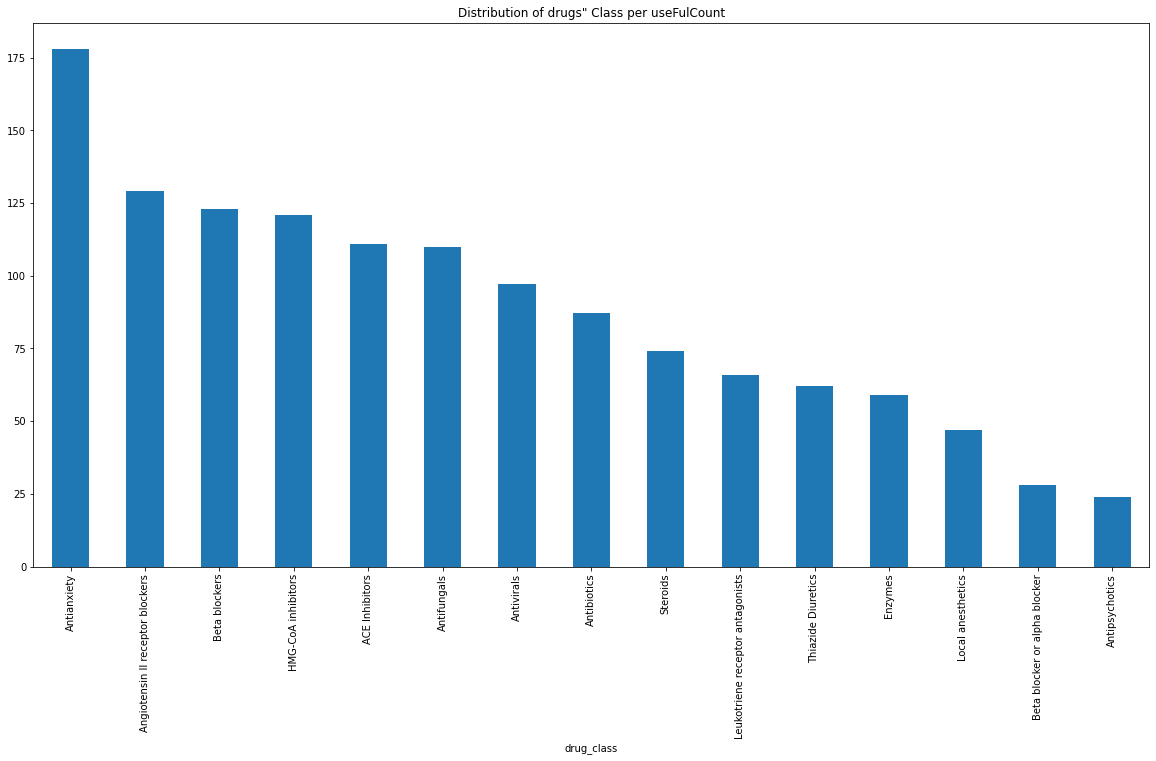

In [108]:
plt.figure(figsize=(20,10))
drug.groupby('drug_class')['usefulCount'].nunique().nlargest(15).plot(kind='bar')
plt.title('Distribution of drugs" Class per useFulCount')
plt.show()

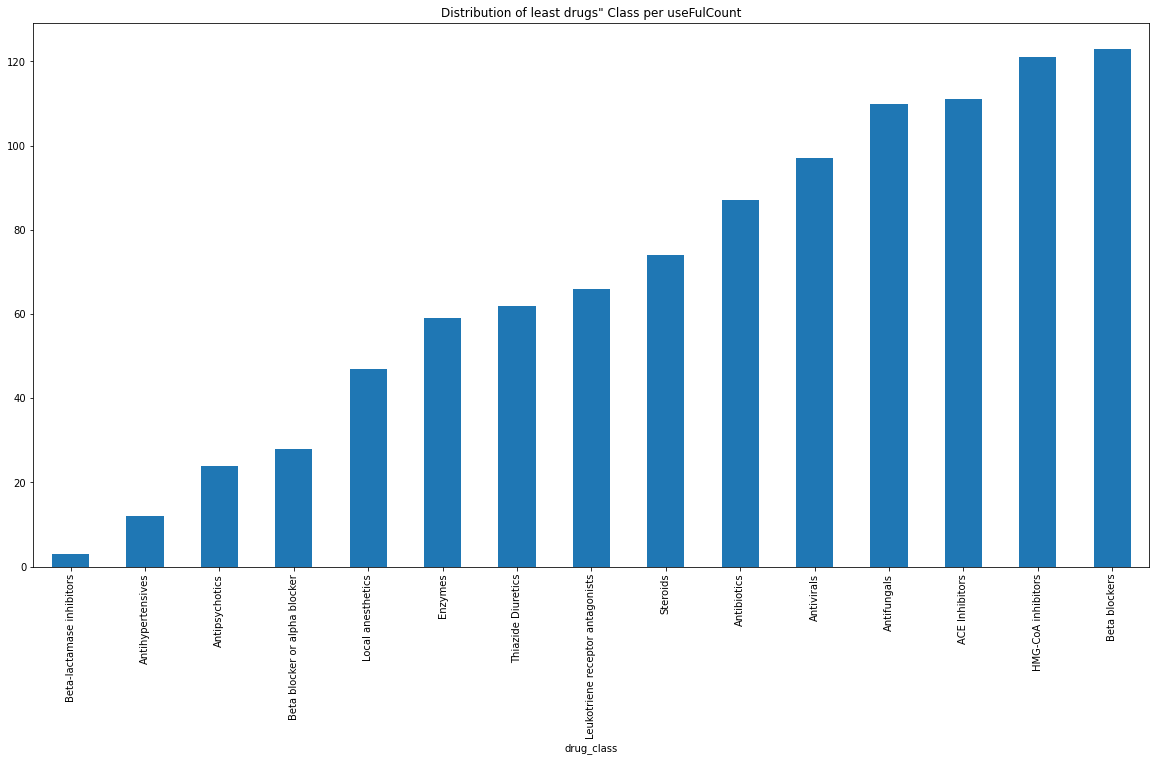

In [109]:
plt.figure(figsize=(20,10))
drug.groupby('drug_class')['usefulCount'].nunique().nsmallest(15).plot(kind='bar')
plt.title('Distribution of least drugs" Class per useFulCount')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

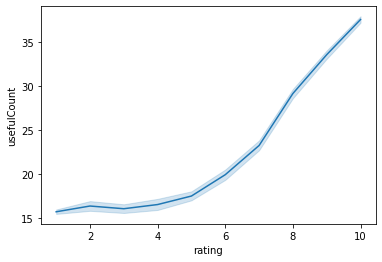

In [110]:
### Correlation between the Rating and UsefulCount
sns.lineplot(data=drug,x='rating',y='usefulCount')

**OBSERVATION**<br>

There is a positive correlation:<br>
+ As the rating increases the usefulCount also increases.

In [112]:
drug.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class', 'sentiment value', 'sentiment label',
       'sentiment_label'],
      dtype='object')

In [113]:
#Rating Per Year
drug.groupby('date')['rating'].size()

date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

In [115]:
#Average Rating Per Year
drug.groupby('date')['rating'].mean()

date
April 1, 2008        8.285714
April 1, 2009        7.666667
April 1, 2010        7.812500
April 1, 2011        8.583333
April 1, 2012        9.238095
                       ...   
September 9, 2013    8.295455
September 9, 2014    8.800000
September 9, 2015    5.733333
September 9, 2016    6.777778
September 9, 2017    5.127273
Name: rating, Length: 3579, dtype: float64

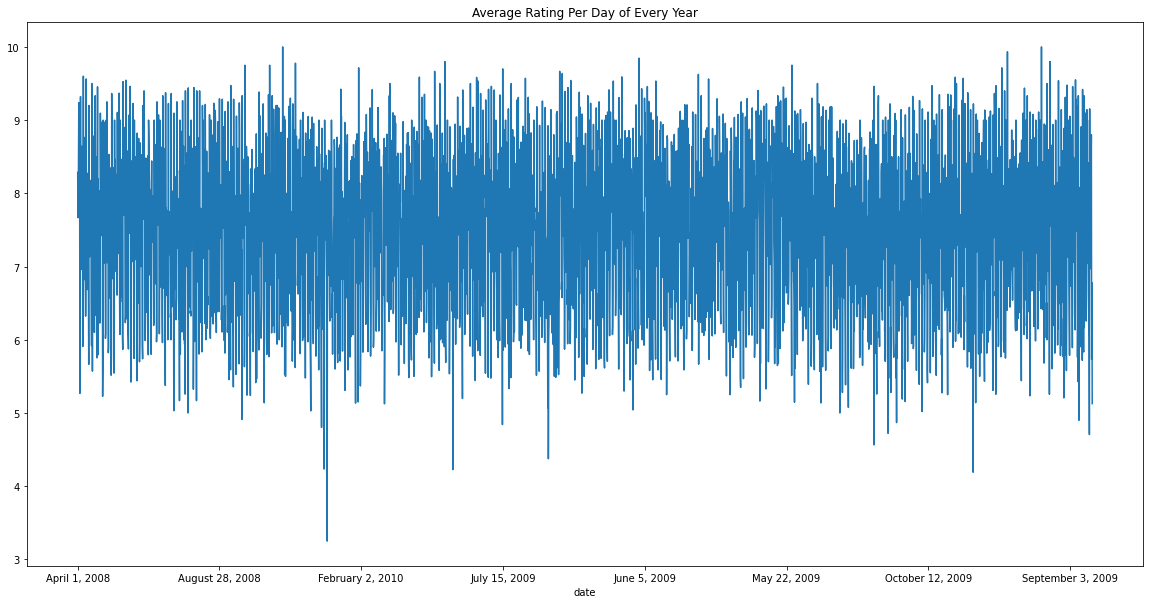

In [119]:
#Average Rating Per Day of Every Year
drug.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Average Rating Per Day of Every Year")
plt.show()

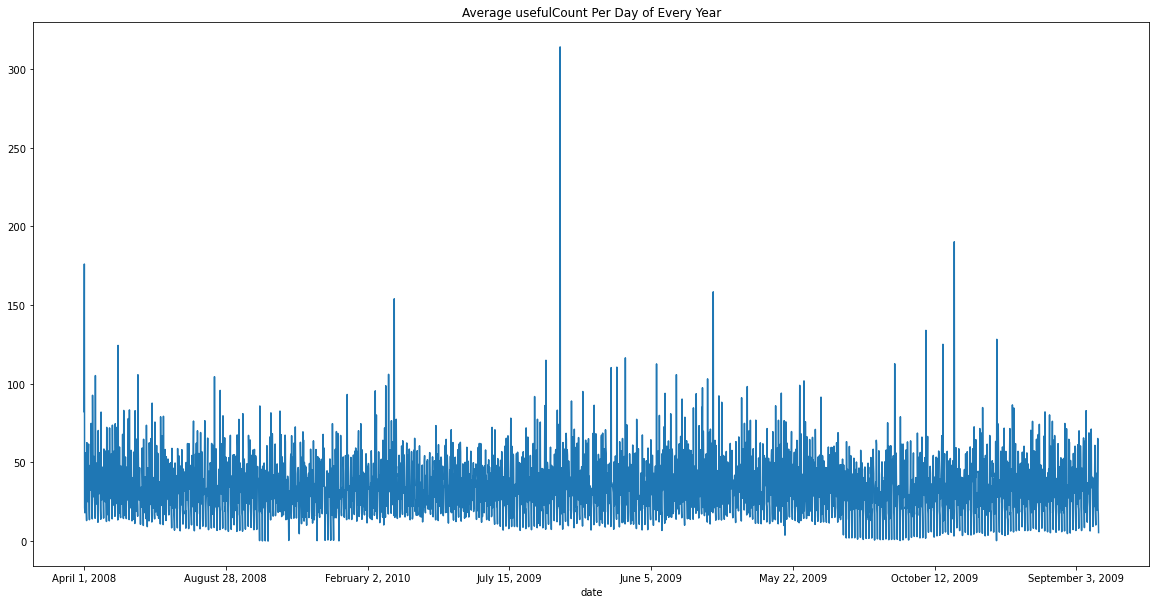

In [120]:
#Average usefulCount Per Day of Every Year
drug.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Average usefulCount Per Day of Every Year")
plt.show()

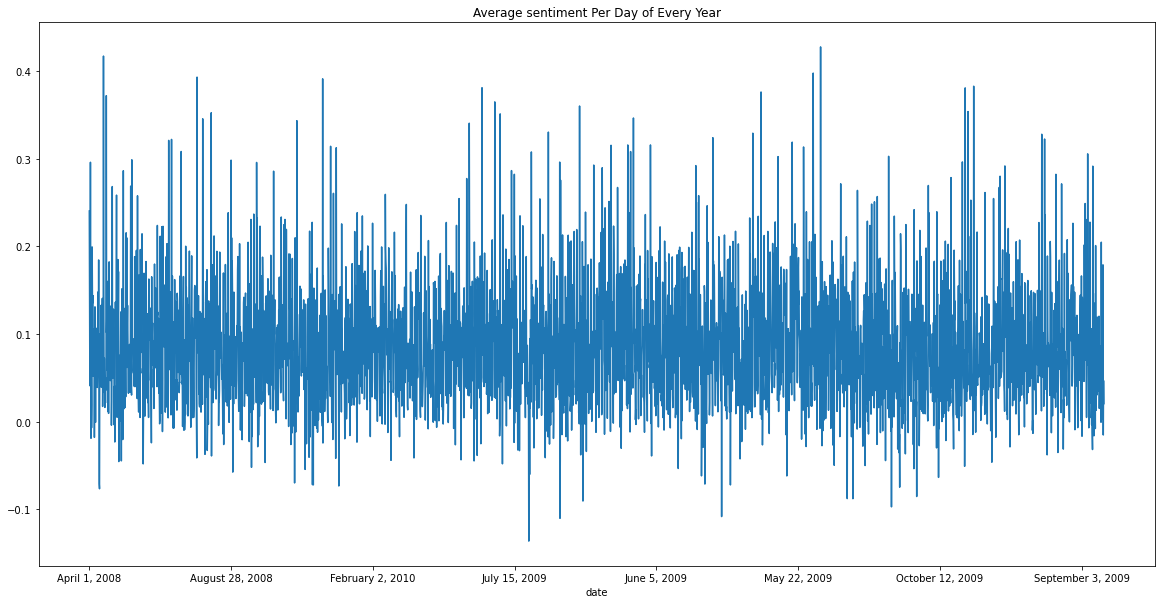

In [122]:
#Average Sentiment Per Day of Every Year
drug.groupby('date')['sentiment value'].mean().plot(figsize=(20,10))
plt.title("Average sentiment Per Day of Every Year")
plt.show()

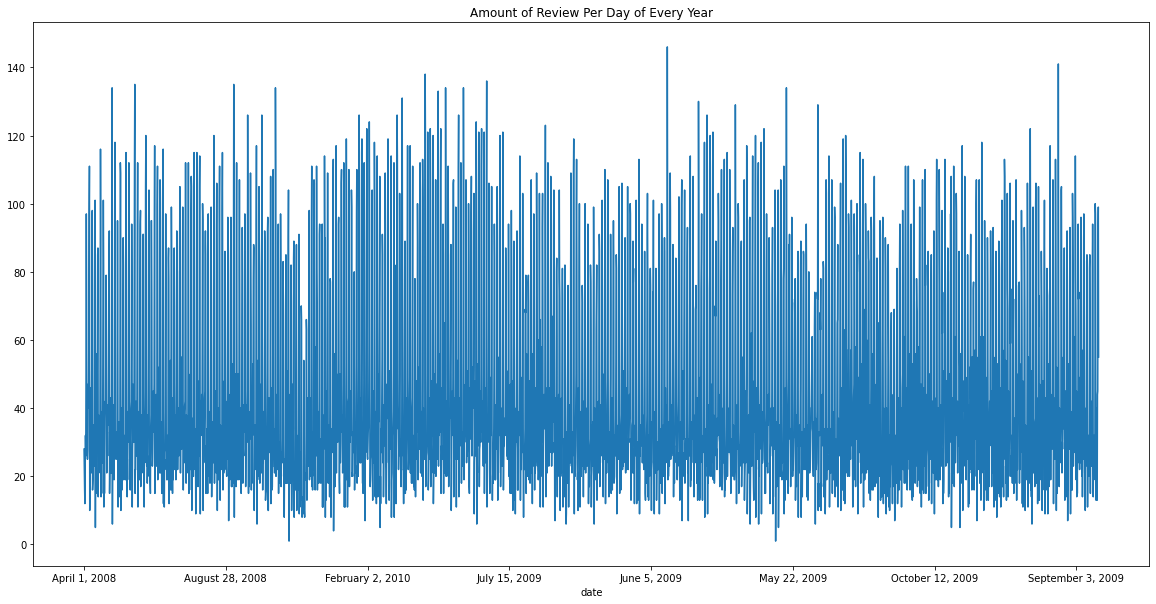

In [124]:
#Amount of Review Per Day of Every year
drug.groupby('date')['review'].size().plot(figsize=(20,10))
plt.title("Amount of Review Per Day of Every Year")
plt.show()

In [127]:
### Using DatetimeIndex
grouped_date = drug.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})

In [129]:
grouped_date['date']= grouped_date.index

In [130]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])

In [132]:
grouped_date.dtypes

rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [133]:

grouped_date = grouped_date.set_index('date')

In [136]:
#Select a partivular date range
grouped_date.loc['2008']

,rating,usefulCount,review
date,,,
2008-04-01,8.285714,2303,28
2008-04-10,9.321429,1752,28
2008-04-11,9.600000,392,10
2008-04-12,9.562500,1483,16
2008-04-13,9.200000,526,5
...,...,...,...
2008-09-05,9.333333,1332,21
2008-09-06,8.909091,233,11
2008-09-07,9.333333,892,15


Text(0.5, 1.0, 'Amount of Reviews in the year 2008')

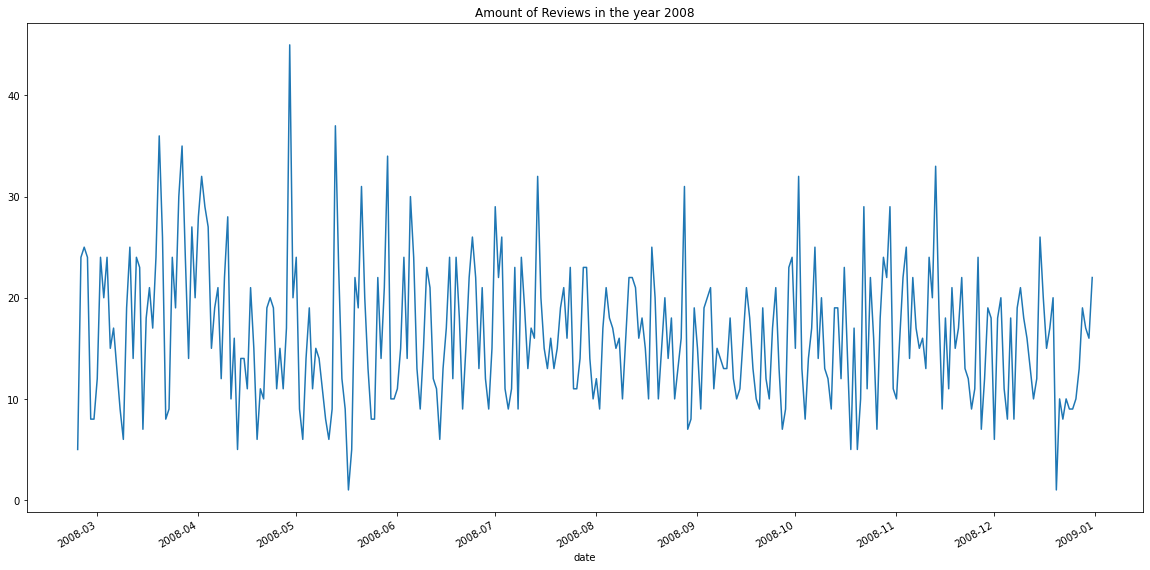

In [154]:
#Amount of Review for 2008
grouped_date.loc['2008']['review'].plot(figsize=(20,10))
plt.title("Amount of Reviews in the year 2008")

<ipython-input-156-8a19e49e6498>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date.loc['2008':'2009']['review'].plot(figsize=(20,10))


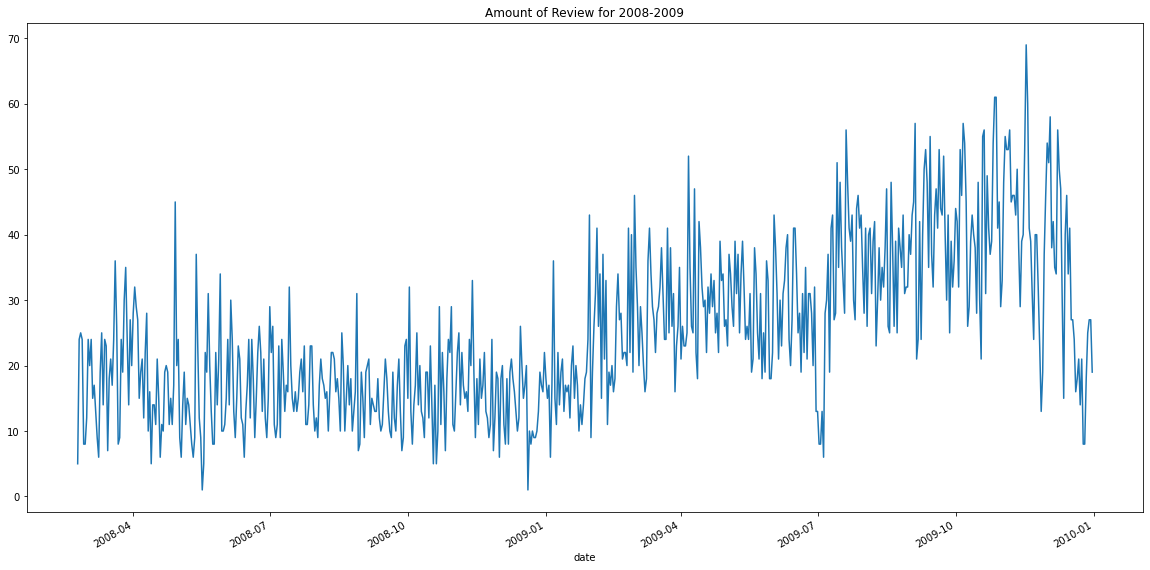

In [156]:
#Amount of Review for 2008
grouped_date.loc['2008':'2009']['review'].plot(figsize=(20,10))
plt.title('Amount of Review for 2008-2009')
plt.show()

**OBSERVATION**<br>
+ As time progresses from 2008 to 2009, the amount of reviews are going up

<ipython-input-157-df1e4f4bb1d7>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date.loc['2008':'2009']['rating'].plot(figsize=(20,10))


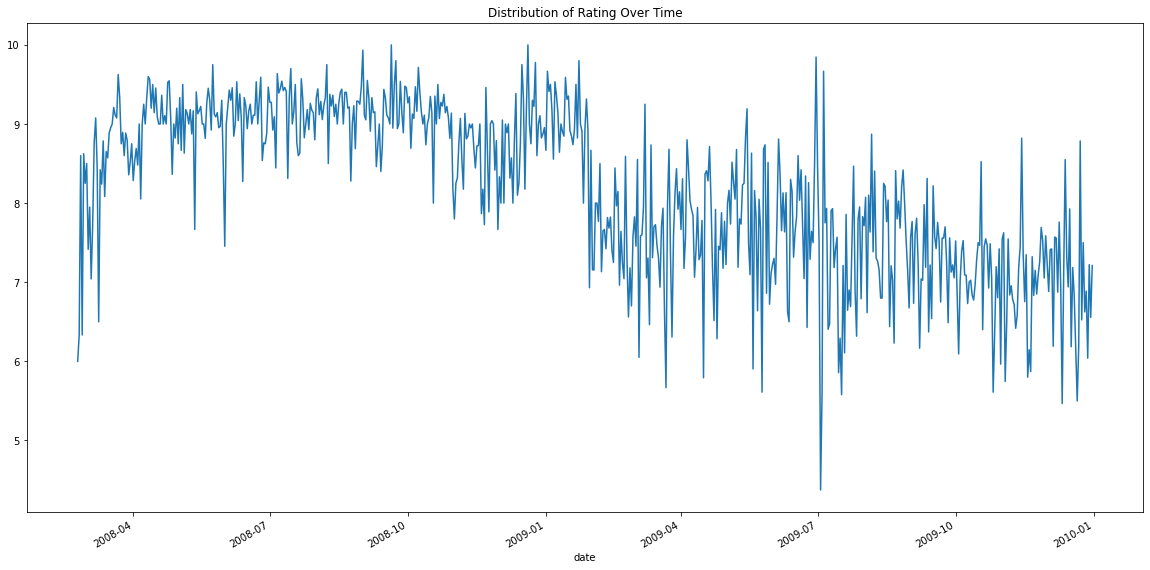

In [157]:
#Distribution of Rating Overtime
grouped_date.loc['2008':'2009']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over Time")
plt.show()

**OBSERVATION**<br>
+ As time progresses from 2008 to 2009, the rating is on a downward trend

<ipython-input-143-0a6f6d077fbb>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  grouped_date.loc['2008':'2012']['rating'].plot(figsize=(20,10))


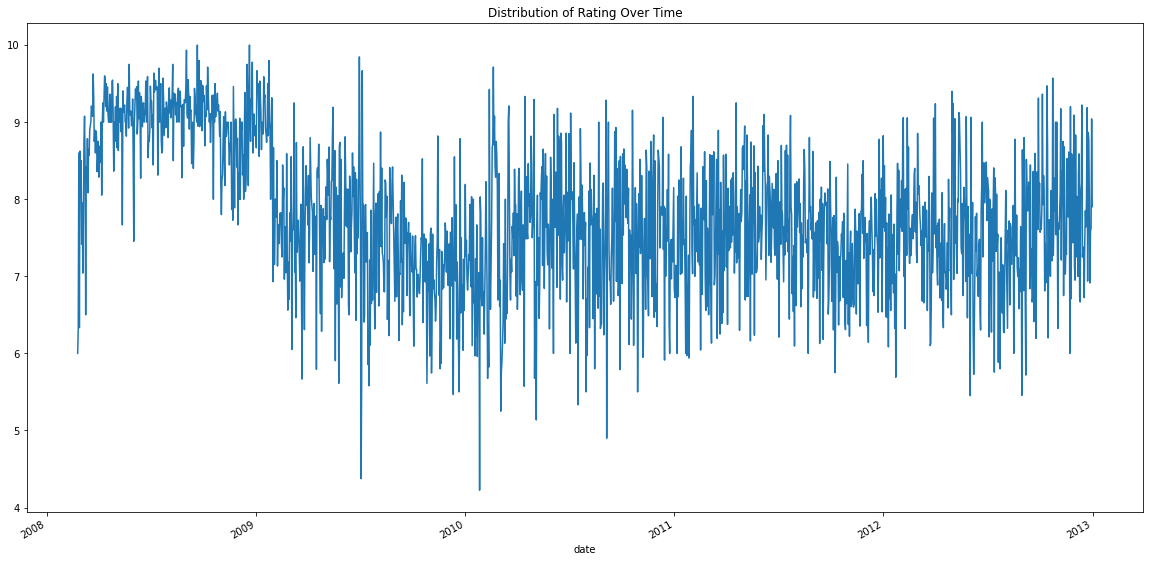

In [143]:
#Distribution of Rating Overtime
grouped_date.loc['2008':'2012']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over Time")
plt.show()

<AxesSubplot:xlabel='date'>

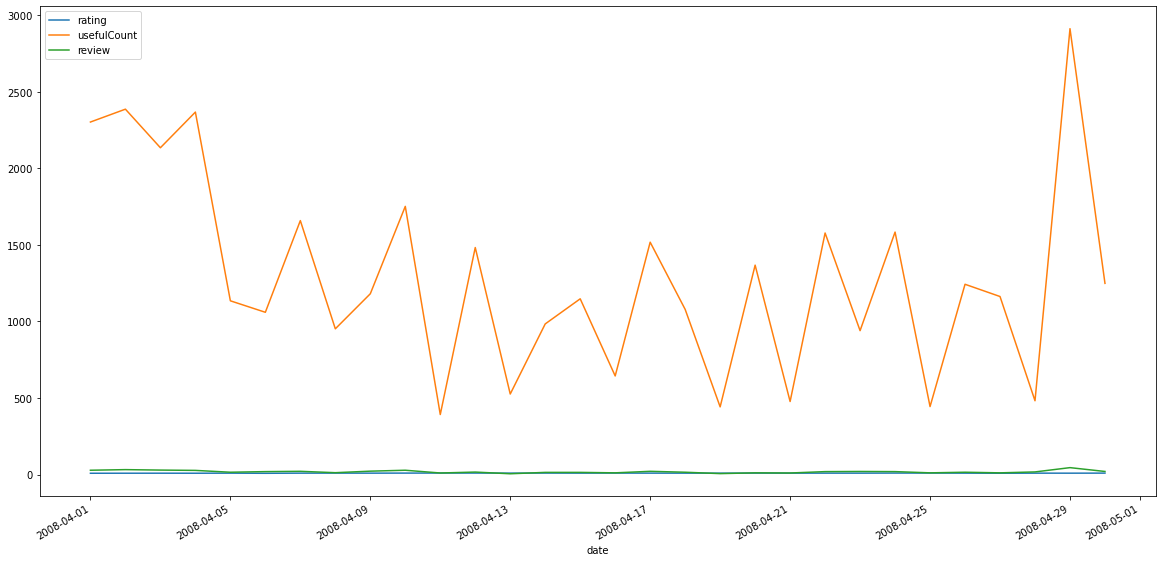

In [158]:
grouped_date.loc['2008-04'].plot(figsize=(20,10))

**OBSERVATION**<br>
> In the month of April-2008, the highest number of usefulCount were on both the beginning and the end of the month

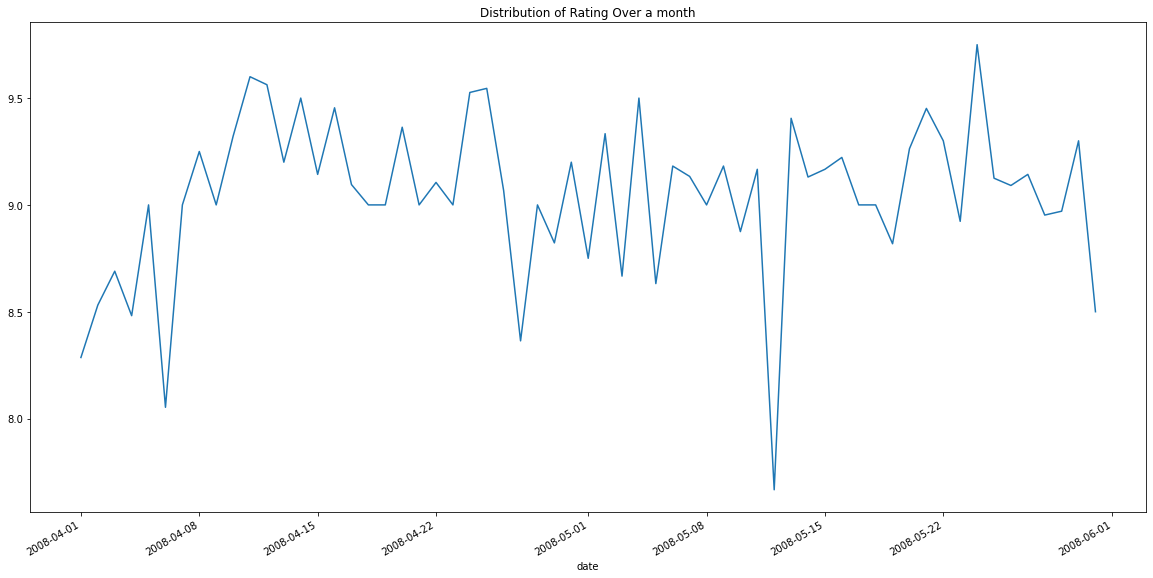

In [148]:
#Distribution of Rating Over a month
grouped_date.loc['2008-4':'2008-5']['rating'].plot(figsize=(20,10))
plt.title("Distribution of Rating Over a month")
plt.show()